In [3]:
import IPython.display as disp
from pymongo import MongoClient
from pprint import pprint

client = MongoClient("mongodb://localhost:27017")
bayarea = client.examples.bayarea

# Data Wrangling with OpenStreetMap <br/> Final Project
**Author: William Truong**

Map Area: San Francisco Bay Area, CA, United States  
Sources:

* [Mapzen Metro Extract Link](https://s3.amazonaws.com/metro-extracts.mapzen.com/san-francisco-bay_california.osm.bz2)  
* [Audit and Shaping into JSON IPython Notebook](Audit_And_Shape.ipynb)  
* [Audit and Shaping into JSON IPython Notebook (html)](Audit_And_Shape.html)

## 1. Problems Encountered in the Map
Several inconsistencies were discovered during the audit:

* Concerning the "addr:street" key
  1. Street names that don't share a common suffix ("1st Street vs. 1st St")
  2. Inconsistent use of N vs North, S vs South, etc.
  3. Address number included in the street names ("Adrian court, Suite A")
  4. Intersections are used for some of the values (Pacheco Blvd @ Blum Rd N Of Sr 4)
  5. Landmarks are used for some of the values (Tanforan Shopping Center).
* Discernable amount of keys prefixed with tiger
* Postal codes (95624 vs. 95624-6003.

### "addr:street" conversion"
In the process of converting the "addr:street" keys into json under the "address"  name, street name suffixes were only fixed since the analysis that was performed did not concern street names in particular.

### tiger data
There was a big number of keys prefixed with tiger. After some researching, it was found that tiger keys originate from Census data. OpenStreetMap initially used tiger data to import mass amounts of map information during the early years.  Future census data will no longer be imported and tiger data is being slowly converted to fit the recommended OpenStreetMap schema. Until it is properly converted, some of these key values need to be converted to the "address" dictionary.

Two keys were converted:  
`"tiger":"zip_left"` -> `"address":"postcode"`  
`"tiger":"county"` -> `"address":"county"`

These two keys were converted only if there wasn't a value in place for those key values located under the address dictionary.

## 2. Data Overview

### File sizes
```
san-francisco-bay_california.osm .............. 1.9G
san-francisco-bay_california.osm.json ......... 2.2G
```

### Number of documents

In [8]:
bayarea.find().count()

10500724

### Number of nodes

In [9]:
bayarea.find({"type": "node"}).count()

9569693

### Number of ways

In [10]:
bayarea.find({"type": "way"}).count()

927745

### Top 10 types of amenities

In [4]:
pipeline = [{"$match": {"amenity": {"$ne": None}}},
                       {"$group": {"_id": "$amenity",
                                   "count": {"$sum": 1}}},
                       {"$sort": {"count": -1}},
                       {"$limit": 10}]
result = bayarea.aggregate(pipeline)
pprint(result)

{u'ok': 1.0,
 u'result': [{u'_id': u'parking', u'count': 11607},
             {u'_id': u'restaurant', u'count': 4854},
             {u'_id': u'school', u'count': 4373},
             {u'_id': u'place_of_worship', u'count': 3053},
             {u'_id': u'fast_food', u'count': 1733},
             {u'_id': u'bench', u'count': 1579},
             {u'_id': u'cafe', u'count': 1476},
             {u'_id': u'toilets', u'count': 1329},
             {u'_id': u'fuel', u'count': 1150},
             {u'_id': u'bicycle_parking', u'count': 1056}]}


### Top 10 fast food chains

In [5]:
# Top 10 fast food chains
pipeline = [{"$match": {"amenity": "fast_food", "name": {"$ne": None}}},
            {"$group": {"_id": "$name", "count": {"$sum": 1}}},
            {"$sort": {"count": -1}},
            {"$limit": 10}]
result = bayarea.aggregate(pipeline)
pprint(result)

{u'ok': 1.0,
 u'result': [{u'_id': u"McDonald's", u'count': 163},
             {u'_id': u'Subway', u'count': 122},
             {u'_id': u'Taco Bell', u'count': 102},
             {u'_id': u'Burger King', u'count': 87},
             {u'_id': u'Jack in the Box', u'count': 55},
             {u'_id': u'KFC', u'count': 36},
             {u'_id': u'Panda Express', u'count': 33},
             {u'_id': u'Jamba Juice', u'count': 31},
             {u'_id': u"Wendy's", u'count': 30},
             {u'_id': u"Carl's Jr.", u'count': 28}]}


### Top 10 types of leisurely activities

In [6]:
pipeline = [{"$match": {"leisure": {"$exists": 1}}}, 
            {"$group": {"_id": "$leisure", "count": {"$sum": 1}}},
                       {"$sort": {"count": -1}},
                       {"$limit": 10}]
result = bayarea.aggregate(pipeline)
pprint(result)

{u'ok': 1.0,
 u'result': [{u'_id': u'pitch', u'count': 4752},
             {u'_id': u'park', u'count': 4582},
             {u'_id': u'garden', u'count': 1922},
             {u'_id': u'swimming_pool', u'count': 1667},
             {u'_id': u'playground', u'count': 1388},
             {u'_id': u'common', u'count': 364},
             {u'_id': u'sports_centre', u'count': 295},
             {u'_id': u'track', u'count': 189},
             {u'_id': u'picnic_table', u'count': 165},
             {u'_id': u'golf_course', u'count': 157}]}


### Top cities with the most leisurely activities

In [8]:
pipeline = [{"$match": {"leisure": {"$exists": 1}, "address.city": {"$exists": 1}}},
            {"$group": {"_id": "$address.city", "count": {"$sum": 1}}},
            {"$sort": {"count": -1}},
            {"$limit": 10}]
result = bayarea.aggregate(pipeline)
pprint(result)

{u'ok': 1.0,
 u'result': [{u'_id': u'Berkeley', u'count': 155},
             {u'_id': u'San Francisco', u'count': 50},
             {u'_id': u'Sonoma', u'count': 20},
             {u'_id': u'Sacramento', u'count': 19},
             {u'_id': u'Santa Cruz', u'count': 11},
             {u'_id': u'West Sacramento', u'count': 11},
             {u'_id': u'San Jose', u'count': 9},
             {u'_id': u'Sunnyvale', u'count': 9},
             {u'_id': u'Oakland', u'count': 8},
             {u'_id': u'Palo Alto', u'count': 7}]}


### Top cities with the most amenities

In [10]:
pipeline = [{"$match": {"amenity": {"$exists": 1}, "address.city": {"$exists": 1}}},
            {"$group": {"_id": "$address.city", "count": {"$sum": 1}}},
            {"$sort": {"count": -1}},
            {"$limit": 10}]
result = bayarea.aggregate(pipeline)
pprint(result)

{u'ok': 1.0,
 u'result': [{u'_id': u'San Francisco', u'count': 1160},
             {u'_id': u'Berkeley', u'count': 374},
             {u'_id': u'Redwood City', u'count': 227},
             {u'_id': u'Oakland', u'count': 187},
             {u'_id': u'Palo Alto', u'count': 172},
             {u'_id': u'San Jose', u'count': 129},
             {u'_id': u'Sacramento', u'count': 126},
             {u'_id': u'Sunnyvale', u'count': 112},
             {u'_id': u'Stockton', u'count': 111},
             {u'_id': u'Sonoma', u'count': 81}]}


### Top cities with the most buildings

In [11]:
pipeline = [{"$match": {"building": {"$exists": 1}, "address.city": {"$exists": 1}}},
            {"$group": {"_id": "$address.city", "count": {"$sum": 1}}},
            {"$sort": {"count": -1}},
            {"$limit": 10}]
result = bayarea.aggregate(pipeline)
pprint(result)

{u'ok': 1.0,
 u'result': [{u'_id': u'Stockton', u'count': 49173},
             {u'_id': u'Redwood City', u'count': 20491},
             {u'_id': u'Palo Alto', u'count': 16241},
             {u'_id': u'San Francisco', u'count': 5471},
             {u'_id': u'Hollister', u'count': 5140},
             {u'_id': u'Piedmont', u'count': 3808},
             {u'_id': u'West Sacramento', u'count': 1335},
             {u'_id': u'Mountain View', u'count': 1080},
             {u'_id': u'Oakland', u'count': 784},
             {u'_id': u'Berkeley', u'count': 606}]}


### Top cities with the most ways and nodes

In [12]:
pipeline = [{"$match": {"address.city": {"$exists": 1}}},
            {"$group": {"_id": "$address.city", "count": {"$sum": 1}}},
            {"$sort": {"count": -1}},
            {"$limit": 10}]
result = bayarea.aggregate(pipeline)
pprint(result)

{u'ok': 1.0,
 u'result': [{u'_id': u'Stockton', u'count': 68070},
             {u'_id': u'Redwood City', u'count': 23589},
             {u'_id': u'West Sacramento', u'count': 20646},
             {u'_id': u'Palo Alto', u'count': 19408},
             {u'_id': u'San Francisco', u'count': 11617},
             {u'_id': u'Hollister', u'count': 5698},
             {u'_id': u'Berkeley', u'count': 5488},
             {u'_id': u'Piedmont', u'count': 3812},
             {u'_id': u'Sunnyvale', u'count': 3765},
             {u'_id': u'Richmond', u'count': 1496}]}


## 3. Other Ideas About the Datasets

### Cleaning Up OpenStreetMap Data
Open Street Map data is not only incomplete but also filled with inconsistencies and lack of structure. Some ideas need to be discussed at a public forum to organize OpenStreetMap data into a more structured form to make this public open source collaboration more relevant compared with Google Maps, Apple Maps, and Yelp.

#### Improvement 1: Fill out the city, county, zip code for all the nodes

In [17]:
bayarea.find({"type": "node"}).count()

9569693

In [14]:
bayarea.find({"type": "node", "address.city": {"$exists": 0}}).count()

9507108

In [15]:
bayarea.find({"type": "node", "address.county": {"$exists": 0}}).count()

9568920

In [16]:
bayarea.find({"type": "node", "address.postcode": {"$exists": 0}}).count()

9543321

For the city, county, and postcode there is only < 1% coverage for all the nodes. During the shaping of the data to JSON, these values can be programmatically filled out if I had a geographical database that can fill out the city, county, and postcode from latitudinal and longitudinal coordinates. Once these values are completed, then more inferences can be made for city-city, county-county, or post code - post code comparisons.

It also would not hurt to recommend to OpenStreetMap to automatically fill these fields for a user when a node or way is inputted or editted.

#### Improvement 2: Making Key Values More Relevant

At this stage, I believe OpenStreetMap data for the bay area is too sparse and fragmented to be able to make solid inferences from it. If we take a look at the database for the types of values for the leisure keys: 

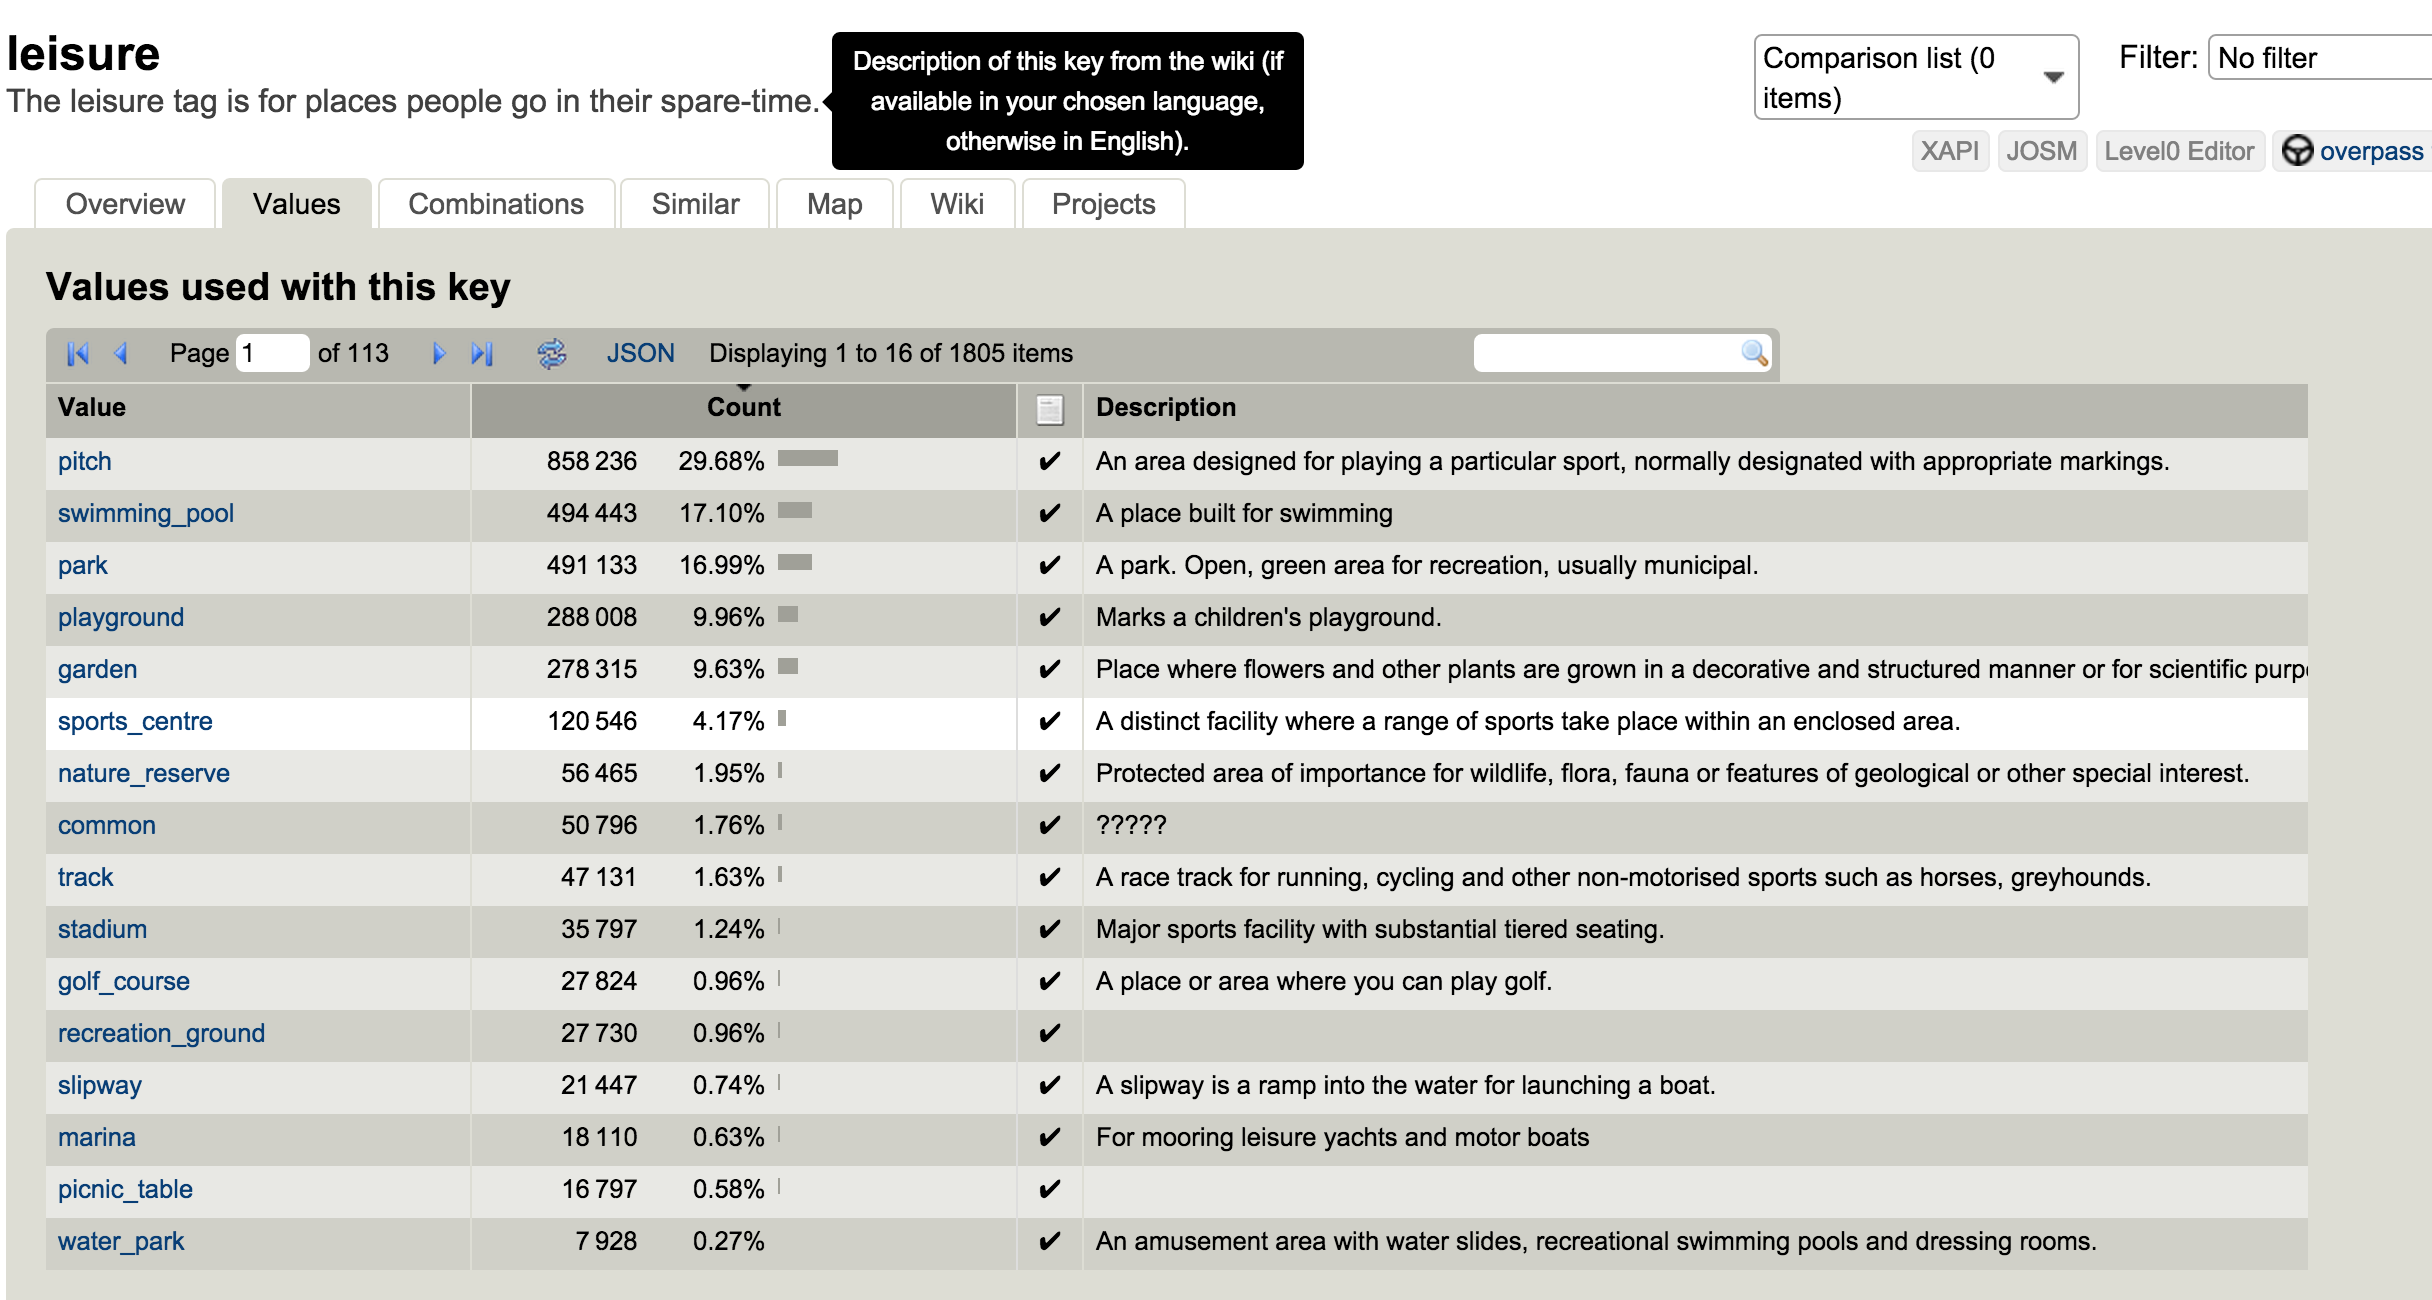

In [18]:
disp.Image("./images/leisure.png")

Source: [http://taginfo.openstreetmap.org/keys/leisure#similar](http://taginfo.openstreetmap.org/keys/leisure#similar)

Majority of the values for the leisure key fall under 6 values. That makes 1799 items that are irrelevant (with 1 item being < 1% of the total count) for making inferences. I believe there needs to be a discussion on how these 1799 values can be consolidated into groups. 

#### Benefits
* Makes data more cross referenceable since nodes will be able to be related to data point in other datasets through city and/or county.
* After consolidation of values for different keys, more inferences can be made and as a result data can be used in many opportunities

#### Potential Issues
* Size of dataset will drastically increase due to the document oriented architecture of Open Street Map data.
* How does an open source project reach a common consensus when consolidating information. Contributers are scattered accross the world.
* Once consolidation of values for keys is achieved, how do we prevent it from being scattered again, while still providing a platform that is community friendly?

### Anomaly: Ununsual amount of entries for Stockton
Analysis of the queries show an unusual amount of entries for the city of Stockton. The number of documents in Stockton is almost 11x the amount in San Francisco. More research needs to be done on why.

If there are incentives or someone has created an efficient script to input/modify data into OpenStreetMap from other sources for the city of Stockton, then we should find out what they are to give the tools more visibility.

### Conclusion
The Open Street Map service is a valuable service that allows the community to rapidly update information about their surrounding areas. However, a common problem with big scale open collaboration efforts is that structure is often sacrificed with the vast amount of collaborators. There needs to be an open forum on how to combat the chaos that naturally comes with open collaboration to keep OpenStreetMap becoming irrelevant compared with Google/Apple maps, Yelp, etc. OpenStreetMap has enormous potential and it is up to the community to spearhead efforts to improve on it's infrastructure.

In [7]:
def css_styling():
    styles = open("../css/custom.css", "r").read()
    return disp.HTML(styles)
css_styling()